In [1]:
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from python import base


DATA_DIR = base.BASE_DIR / 'data/KOSIS/data'
FIGURES_DIR = base.BASE_DIR / 'figures'


DATA_FILES = [*map(Path, glob(str(DATA_DIR / '*.csv')))]

for file in DATA_FILES:
    print(file.name)

문화예술행사_참여_만족도대중음악_연예_20241129080354.csv
공연시설__공연장_가동률_20241129074204.csv
지난_1년_동안_한번이상_참여한_여가활동_유형_복수응답_문화예술....csv
공연시설_및_단체_수_20241129073956.csv
지난_1년_동안_여가생활을_위한_한_달_평균_지출_금액_20241129075431.csv
지속적_반복적_참여_여가활동_분야_및_활동_문화예술관람활동_20241129075447.csv
문화예술행사_직접_관람_만족도대중음악_연예_20241129080511.csv
공연시설_및_단체_매출액_20241129080941.csv
문화예술행사_직접_관람횟수__대중음악_연예_20241129080635.csv
공연시설_및_단체_수_20241129080915.csv
행사별_직접관람률_복수응답__20241129080738.csv
초등학교_4학년_팬덤_활동_빈도_20241129071614.csv
공연시설_및_단체_매출액_20241129073846.csv
중학교_1학년_팬덤_활동_빈도_20241129072114.csv
분야별_문화예술행사_관람률_20241129080554.csv


In [2]:
def load_data() -> pd.DataFrame:
    df = pd.read_csv(DATA_DIR / '공연시설_및_단체_매출액_20241129080941.csv', header=None)
    df = df.transpose()
    df.columns = ['연도', '구분', '집계', '전체', '공연시설', '공연단체']
    df = df[1:]
    # convert str -> float
    for col in ['전체', '공연시설', '공연단체']:
        # 단위를 백만원 -> 만원으로 변경
        df[col] = df[col].str.replace('-', '0').astype(np.float64) * 100
    return df

load_data()

,연도,구분,집계,전체,공연시설,공연단체
1,2012,매출액,소계,71304500.0,37716900.0,33587600.0
2,2012,전년조사 대비 증감,증감수,0.0,6045800.0,11400400.0
3,2012,전년조사 대비 증감,증감률,0.0,1910.0,5140.0
4,2013,매출액,소계,41420400.0,41420400.0,0.0
5,2013,전년조사 대비 증감,증감수,3703500.0,3703500.0,0.0
6,2013,전년조사 대비 증감,증감률,980.0,980.0,0.0
7,2014,매출액,소계,75931500.0,36889000.0,39042500.0
8,2014,전년조사 대비 증감,증감수,0.0,4531400.0,5454900.0
9,2014,전년조사 대비 증감,증감률,0.0,1090.0,1620.0
10,2015,매출액,소계,78149100.0,38743300.0,39405800.0


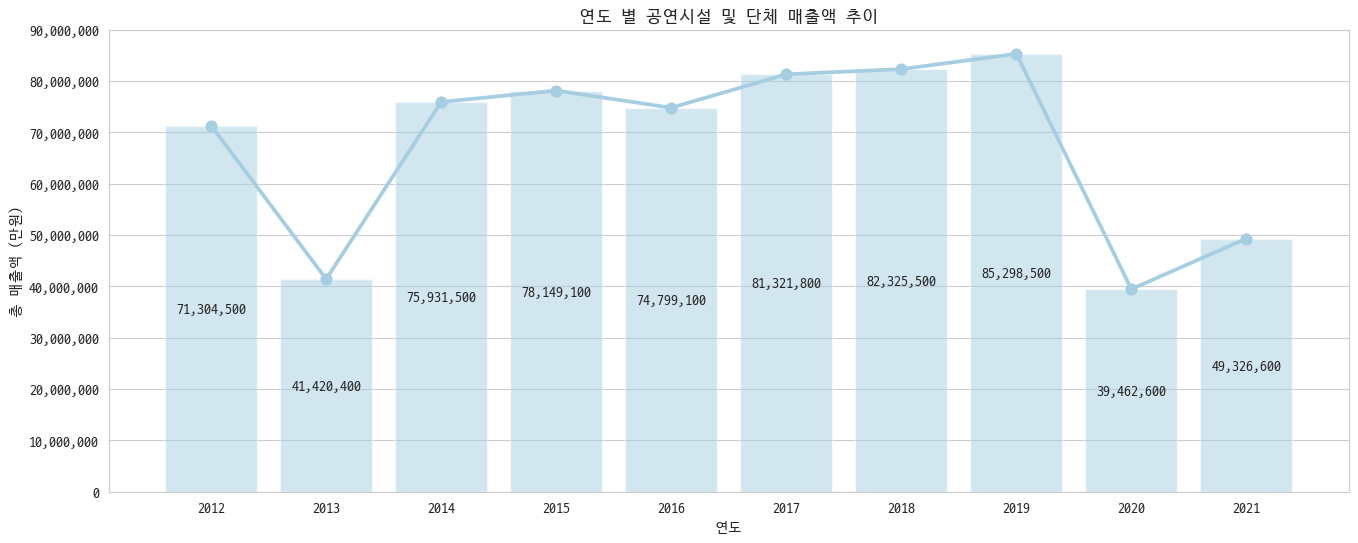

In [3]:
df = load_data()
df = df[df['구분'] == '매출액'].groupby(['연도']).sum().reset_index()

plt.figure(figsize=(16, 6))
plt.title('연도 별 공연시설 및 단체 매출액 추이')
sns.pointplot(data=df, x='연도', y='전체')
plt.bar_label(plt.bar(x=df['연도'], height=df['전체'], alpha=0.5), fmt=base.formatter, label_type='center', fontsize=10)
plt.ylabel('총 매출액 (만원)')
plt.yticks(**base.formatted_ticks_kwargs(plt.yticks()[0]))
plt.savefig(FIGURES_DIR / '연도별_공연시설_및_단체_매출액')
plt.show()